In [2]:
cd

C:\Users\10336713


In [3]:
cd desktop

C:\Users\10336713\desktop


In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv') # Import data to read 

In [7]:
df.head(10) #To get headings

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [8]:
ireland_temp =(df.loc[df['Country'] == 'Ireland']) # Give all records relating to temp in Ireland from earliest date on
print ireland_temp

                dt  AverageTemperature  AverageTemperatureUncertainty  Country
253030  1743-11-01               7.730                          1.854  Ireland
253031  1743-12-01                 NaN                            NaN  Ireland
253032  1744-01-01                 NaN                            NaN  Ireland
253033  1744-02-01                 NaN                            NaN  Ireland
253034  1744-03-01                 NaN                            NaN  Ireland
253035  1744-04-01               8.814                          2.372  Ireland
253036  1744-05-01              10.090                          1.641  Ireland
253037  1744-06-01              13.252                          1.765  Ireland
253038  1744-07-01              14.273                          1.741  Ireland
253039  1744-08-01                 NaN                            NaN  Ireland
253040  1744-09-01              11.812                          1.765  Ireland
253041  1744-10-01               8.966              

In [9]:
# Alternatively we could do
print (df[df.Country == 'Ireland'].head(4))
print (df[df.Country == 'Ireland'].tail(4))

                dt  AverageTemperature  AverageTemperatureUncertainty  Country
253030  1743-11-01                7.73                          1.854  Ireland
253031  1743-12-01                 NaN                            NaN  Ireland
253032  1744-01-01                 NaN                            NaN  Ireland
253033  1744-02-01                 NaN                            NaN  Ireland
                dt  AverageTemperature  AverageTemperatureUncertainty  Country
256265  2013-06-01              13.663                          0.248  Ireland
256266  2013-07-01              17.299                          0.368  Ireland
256267  2013-08-01              15.168                          0.564  Ireland
256268  2013-09-01                 NaN                            NaN  Ireland


In [10]:
# To select only wanted coulmns and store for later use. In this case average temp, date and country
columns_wanted = ['dt', 'AverageTemperature', 'Country']
print(df[columns_wanted].head())

           dt  AverageTemperature Country
0  1743-11-01               4.384   Åland
1  1743-12-01                 NaN   Åland
2  1744-01-01                 NaN   Åland
3  1744-02-01                 NaN   Åland
4  1744-03-01                 NaN   Åland


In [11]:
# Now we have an idea of dates
# Of interest to me is the winter of 46 - 47 which was supposed to be particularly bitter
# now we will look at Europe temperature over time compared to the United States to get an idea
# of temp of landmasses Ireland is influenced by temp wise for a later comparison
Europe_temp = (df.loc[df['Country'] == 'Europe'])
America_temp = (df.loc[df['Country'] == 'United States'])
# For later on
UK_temp = (df.loc[df['Country'] == 'United Kingdom'])

In [12]:
len(Europe_temp) # Get number of occurences

3239

3239


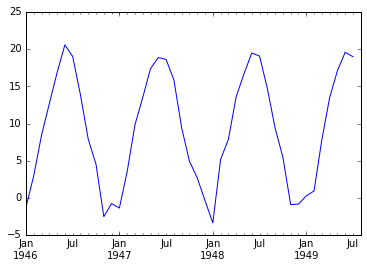

In [13]:
dates = pd.date_range('1946-01-01', '1949-09-01', freq='M')
columns_wanted = ['dt', 'AverageTemperature','AverageTemperatureUncertainty']
europe_temp_no_nan = Europe_temp[columns_wanted]
print len(europe_temp_no_nan)
europe_ts = pd.Series(data=europe_temp_no_nan['AverageTemperature'].tolist()[3239-44:], index=dates)
europe_ts.plot()

In [14]:
len(America_temp)

2941

2941


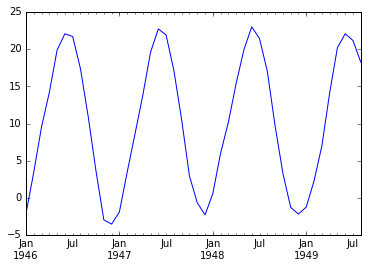

In [15]:
dates = pd.date_range('1946-01-01', '1949-09-01', freq='M')
columns_wanted = ['dt', 'AverageTemperature','AverageTemperatureUncertainty']
america_temp_no_nan = America_temp[columns_wanted] # No longer filling in nan with 0
print len(america_temp_no_nan)
america_ts = pd.Series(data=america_temp_no_nan['AverageTemperature'].tolist()[2941-44:], index=dates)
america_ts.plot()

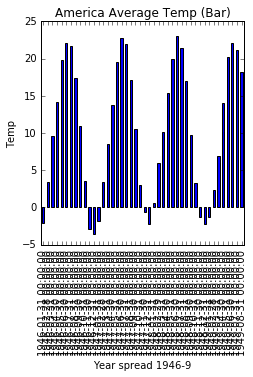

In [16]:
# Bar chart based off above to see if it gives greater clarity
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Year spread 1946-9')
ax1.set_ylabel('Temp')
ax1.set_title("America Average Temp (Bar)")
america_ts.plot(kind='bar')

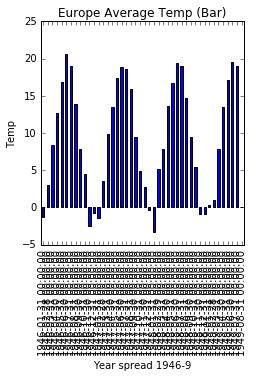

In [17]:
fig2 = plt.figure(figsize=(8,4))
ax2 = fig2.add_subplot(121)
ax2.set_xlabel('Year spread 1946-9')
ax2.set_ylabel('Temp')
ax2.set_title("Europe Average Temp (Bar)")
europe_ts.plot(kind='bar')

3239


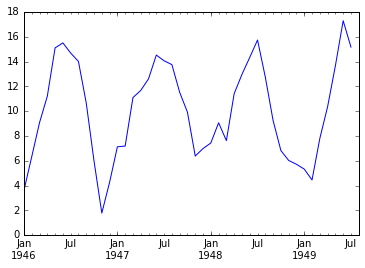

In [18]:
# Having seen Europe and America over 46-49 period we can look at the figures for Ireland and UK
dates = pd.date_range('1946-01-01', '1949-09-01', freq='M')
columns_wanted = ['dt', 'AverageTemperature','AverageTemperatureUncertainty']
ireland_temp_no_nan = ireland_temp[columns_wanted] # No longer filling in nan with 0
print len(ireland_temp_no_nan)
ireland_ts = pd.Series(data=ireland_temp_no_nan['AverageTemperature'].tolist()[3239-44:], index=dates)
ireland_ts.plot()

3239


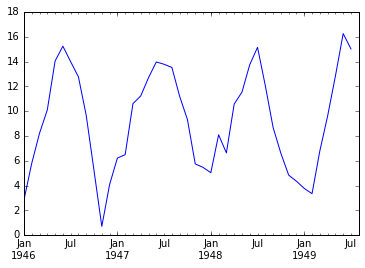

In [19]:
# The above confrims that winter 46/7 was unusually cold for Ireland though not by standards of continent
# So what about the UK?
dates = pd.date_range('1946-01-01', '1949-09-01', freq='M')
columns_wanted = ['dt', 'AverageTemperature','AverageTemperatureUncertainty']
uk_temp_no_nan = UK_temp[columns_wanted] # No longer filling in nan with 0
print len(uk_temp_no_nan)
uk_ts = pd.Series(data=uk_temp_no_nan['AverageTemperature'].tolist()[3239-44:], index=dates)
uk_ts.plot()

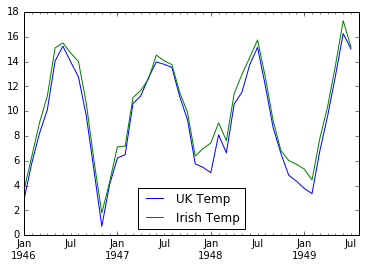

In [20]:
# Comparing Ireland and UK on same graph
ukire_ts = pd.DataFrame(data={'UK Temp' : uk_temp_no_nan['AverageTemperature'].tolist()[3239-44:], 'Irish Temp' : ireland_temp_no_nan['AverageTemperature'].tolist()[3239-44:]}, index=dates, columns=['UK Temp','Irish Temp'])
ukire_ts.plot()

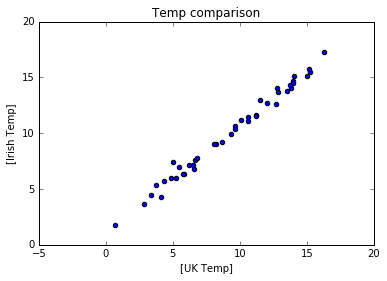

In [21]:
# Scatterplot of above
#temp1 = ukire_ts.plot(color = ['r','g']).scatter(['UK Temp'],['Irish Temp'])
temp1 = ukire_ts.plot.scatter(['UK Temp'],['Irish Temp'])
temp1.set(title='Temp comparison')

In [23]:
# So clearly this doesn't work
columns_needed = ['Irish Temp']
ukire_ts[columns_needed].mean

<bound method DataFrame.mean of             Irish Temp
1946-01-31       3.612
1946-02-28       6.329
1946-03-31       9.076
1946-04-30      11.208
1946-05-31      15.106
1946-06-30      15.508
1946-07-31      14.691
1946-08-31      14.012
1946-09-30      10.666
1946-10-31       5.984
1946-11-30       1.784
1946-12-31       4.268
1947-01-31       7.129
1947-02-28       7.189
1947-03-31      11.100
1947-04-30      11.674
1947-05-31      12.611
1947-06-30      14.526
1947-07-31      14.066
1947-08-31      13.758
1947-09-30      11.524
1947-10-31       9.917
1947-11-30       6.383
1947-12-31       6.987
1948-01-31       7.435
1948-02-29       9.067
1948-03-31       7.628
1948-04-30      11.415
1948-05-31      12.971
1948-06-30      14.338
1948-07-31      15.743
1948-08-31      12.749
1948-09-30       9.242
1948-10-31       6.827
1948-11-30       6.028
1948-12-31       5.720
1949-01-31       5.330
1949-02-28       4.456
1949-03-31       7.798
1949-04-30      10.364
1949-05-31      13.663
19

In [29]:
# This way, with numpy, will though.
# 1st is average of Irish temp over that period
ukire_me = ukire_ts['Irish Temp']
np.mean(ukire_me)

10.054627906976748

In [30]:
# 2nd is average of Irish temp over that period
ukire_me = ukire_ts['UK Temp']
np.mean(ukire_me)

9.253488372093024

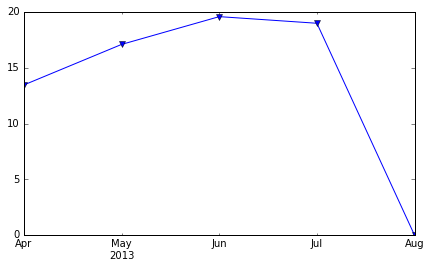

In [103]:
# This is a test to check time line - ignore 
import datetime
dStart = datetime.datetime(2013,4,1)
dEnd = datetime.datetime(2013,9,1)

dateIndex = pd.date_range(start=dStart, end=dEnd, freq='M')

testSeries = pd.Series(data=[13.466,17.096,19.585,18.991,0.000],
                           index=dateIndex)    

ax = plt.figure(figsize=(7,4), dpi=300).add_subplot(111)
testSeries.plot(ax=ax, style='v-', label='first line')